In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

data_path = 'D:\\dataset\\NLP\\WhatApps\\'
file_name = 'Etw_KG_chat.txt'
conversationPath = data_path + file_name

import pandas as pd

###1 method 1 - defalut break at '\n'
txt_file = conversationPath
# some regex to account for messages taking up multiple lines
with open(txt_file, encoding="utf8") as file:
    data = file.read()
    data = data.splitlines()

print(f'data-type:{type(data)}, data-len:{len(data)}')

###2 method 2 - customize break at '[\n]'
with open(conversationPath,"r", encoding="utf8") as f:
    queries = f.read()
    
#data_list = queries.split('\n[')
data_list = queries.split('[')

data1 = []
for i, lst in enumerate(data_list):
    #print(i, lst)
    lst1 = '['+lst.replace('[', '') #'['+data_list[0].replace('[', '')
    data1.append(lst1)
    #print(i, lst1)
print(f'data1-type:{type(data1)}, data1-len:{len(data1)}')

'''
ref:
https://www.linkedin.com/pulse/whatsapp-group-chat-analysis-using-python-varun-maniyan?trk=pulse-article_more-articles_related-content-card
https://towardsdatascience.com/a-comprehensive-data-analysis-on-a-whatsapp-group-chat-25d9535f3c65


Who are the different people in the group chat?
Who are the most active users in the group?
What is the timeline of data we have?
What is the most active time of messages in the group throughout the day?
Which was the busiest month or most active months of conversation?
Which emoji was used most in messages?
What are the top words used in the conversation?
'''



data-type:<class 'list'>, data-len:15903
data1-type:<class 'list'>, data1-len:8943


'\nref:\nhttps://www.linkedin.com/pulse/whatsapp-group-chat-analysis-using-python-varun-maniyan?trk=pulse-article_more-articles_related-content-card\nhttps://towardsdatascience.com/a-comprehensive-data-analysis-on-a-whatsapp-group-chat-25d9535f3c65\n\n\nWho are the different people in the group chat?\nWho are the most active users in the group?\nWhat is the timeline of data we have?\nWhat is the most active time of messages in the group throughout the day?\nWhich was the busiest month or most active months of conversation?\nWhich emoji was used most in messages?\nWhat are the top words used in the conversation?\n'

In [ ]:
# check specific msg for bug

data[0:5]
'''
wrong format : year missing / sec missing 
ValueError: time data "20/06, 1:12 pm" doesn't match format "%d/%m/%y, %I:%M:%S %p", at position 7883.
>> temp manual corrected
TBC: chk which is missing in date ptrn -- correct it

[20/06, 1:12 pm] Dr Jyoti Verma: दीपिका वर्मा 
स्टॉल में वेज बिरयानी और ढोकला
[20/06, 1:13 pm] Dr Jyoti Verma: 6 स्टॉल कन्फर्म हो गए हैं अभी डिशेज़ के नाम आने बाकी हैं


'''
#
data[7883]

In [2]:
def WhatsApp_IOS_Data_df1(txt_file):
    '''
    Jul07,2023 : updated for customize break
    Jun05,2023 : initial version
    iOS Format only - Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
    import pandas as pd

    #txt_file = conversationPath
    # some regex to account for messages taking up multiple lines
#     with open(txt_file, encoding="utf8") as file:
#         data = file.read()
#         data = data.splitlines()
        
    with open(txt_file,"r", encoding="utf8") as f:
        queries = f.read()
    
    #data_list = queries.split('\n[')
    data_list = queries.split('[')

    data = []
    for i, lst in enumerate(data_list):
        #print(i, lst)
        lst1 = '['+lst.replace('[', '') #'['+data_list[0].replace('[', '')
        data.append(lst1)
        #print(i, lst1)
    
    #print(f'data-len:{len(data)}, data-typ:{type(data)}')

    user     = [] 
    message  = [] 
    datetime = []

    import re
    #for row in data[0:10]:
    for row in data:
        #print('\n row:', row)
        #print(f'row-len:{len(row)}, row:{row}')

        if len(row) > 5:
            #1 timestamp is before the first dash
            try:
                #print('inside try:')
                #print('inside try:', re.findall(r'\[.*?\]', row)[0])

                str_date = re.findall(r'\[.*?\]', row)[0]
                #print('str_date:', str_date)
                datetime.append(str(str_date)[1:-1].strip())

            except:
                #print('inside except')
                str_date=' '
                #datetime.append('')
                pass

            #2 user
            if str_date: #if date there
                try:
                    s = re.search('] (.*?):', row).group(1)
                    user.append(s)
                    #print('user:', s)
                except:
                    #user.append('')
                    pass

                #3 message content is after the first colon
                try:
                    message.append(row.split(': ', 1)[1])
                    #print('message:', row.split(': ', 1)[1])
                except:
                    #message.append('')
                    pass
    print(f'user:{len(user)}, message:{len(message)}, datetime:{len(datetime)}')
    df = pd.DataFrame(zip(datetime, user, message), columns=['date_time', 'user', 'message'])
    df['date_time'] = pd.to_datetime(df.date_time, format='%d/%m/%y, %I:%M:%S %p') # error duto mixed format
    #df['date_time'] = pd.to_datetime(df.date_time, format='mixed')
    # # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)
    return df

import pandas as pd

whatsapp_df1 = WhatsApp_IOS_Data_df1(conversationPath)
#whatsapp_df['date_time'] = pd.to_datetime(whatsapp_df.datetime, format='%d/%m/%y, %I:%M:%S %p')
whatsapp_df1.to_csv(data_path+'Etawah_KG_persed_data.csv')

# whatsapp_df['year'] = whatsapp_df['datetime'].dt.year
# whatsapp_df['month'] = whatsapp_df['datetime'].dt.month
# whatsapp_df['month_year'] = whatsapp_df.apply(lambda x: str(x['year'])+'-'+str(x['month']), axis=1)

# filter till jun2023 analysis
whatsapp_df1 = whatsapp_df1[whatsapp_df1.date_time<'2023-07-01']

whatsapp_df1

user:8938, message:8938, datetime:8942


,date_time,user,message
0,2022-07-11 17:39:35,Etawah kurmi samaj,‎Messages and calls are end-to-end encrypted. ...
1,2022-07-11 17:39:35,Shani Etw Ram Shyam Bhai,‎Shani Etw Ram Shyam Bhai created group “Kurmi...
2,2022-07-11 17:39:36,Etawah kurmi samaj,‎Shani Etw Ram Shyam Bhai added you\n
3,2022-07-11 17:43:50,Shani Etw Ram Shyam Bhai,‎Shani Etw Ram Shyam Bhai changed this group's...
4,2022-07-11 18:01:59,Ajay Verma,Very good\n
...,...,...,...
8930,2023-06-30 20:19:20,Meena Bhabhi Pikku Bhai,‎This message was deleted.\n
8931,2023-06-30 21:03:37,Meena Bhabhi Pikku Bhai,🙏👏 क्षमा कीजिए गुरुद्वारा के संन्त गुरु महत्...
8932,2023-06-30 21:30:26,Rajesh Verma Etw Kg Eng,सम्मानित साथियो\n***************\nजैसा कि गुरू...
8933,2023-06-30 21:49:11,Rajesh Verma Etw Kg Eng,*अखिल भारतीय कुर्मी क्षत्रिय महासभा इटावा माह ...


In [109]:
whatsapp_df1.message.values[15]
#whatsapp_df.message.values[15]

'*शबरी को आश्रम सौंपकर महर्षि मतंग जब देवलोक जाने लगे, तब शबरी भी साथ जाने की जिद करने लगी।*\n\nशबरी की उम्र *दस वर्ष* थी। वो महर्षि मतंग का हाथ पकड़ रोने लगी।\n\nमहर्षि शबरी को रोते देख व्याकुल हो उठे। शबरी को समझाया *"पुत्री इस आश्रम में भगवान आएंगे, तुम यहीं प्रतीक्षा करो।"*\n\nअबोध शबरी इतना अवश्य जानती थी कि गुरु का वाक्य सत्य होकर रहेगा, उसने फिर पूछा- *कब आएंगे..?*\n\nमहर्षि मतंग त्रिकालदर्शी थे। वे भूत भविष्य सब जानते थे, वे ब्रह्मर्षि थे। *महर्षि शबरी के आगे घुटनों के बल बैठ गए और शबरी को नमन किया।*\n\n *आसपास उपस्थित सभी ऋषिगण असमंजस में डूब गए।*  ये उलट कैसे हुआ। *गुरु यहां शिष्य को नमन करे, ये कैसे हुआ???*\n\nमहर्षि के तेज के आगे कोई बोल न सका।\nमहर्षि मतंग बोले- \n*पुत्री अभी उनका जन्म नहीं हुआ।*\n*अभी दशरथ जी का लग्न भी नहीं हुआ।*\n*उनका कौशल्या से विवाह होगा।* फिर भगवान की लम्बी प्रतीक्षा होगी। \n*फिर दशरथ जी का विवाह सुमित्रा से होगा।* फिर प्रतीक्षा..\n\n*फिर उनका विवाह कैकई से होगा।* फिर प्रतीक्षा.. \n\nफिर वो *जन्म* लेंगे, फिर उनका *विवाह माता जानकी से होगा।* फिर उन्हे

In [3]:
whatsapp_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8935 entries, 0 to 8934
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8935 non-null   datetime64[ns]
 1   user       8935 non-null   object        
 2   message    8935 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 279.2+ KB


In [16]:
import re
import emoji
import pandas as pd
import numpy as np

def df_basic_cleanup(df):
    df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%y, %I:%M %p')
    df['dt']        = pd.to_datetime(df['date_time']).dt.date
    df['month']     = pd.to_datetime(df['date_time']).dt.month.astype(str).str.zfill(2)
    df['monthn']    = pd.to_datetime(df['date_time'],format='%d/%m/%y, %I:%M %p').dt.month_name()
    df['date']      = pd.to_datetime(df['date_time']).dt.day
    df['day']       = pd.to_datetime(df['date_time']).dt.day_name()
    df['time']      = pd.to_datetime(df['date_time']).dt.time
    df['hour']      = pd.to_datetime(df['date_time']).dt.hour
    df['min']       = pd.to_datetime(df['date_time']).dt.minute
    df['hm']        = df['hour'] + round(df['min']/60,2)
    df['year']      = pd.to_datetime(df['date_time']).dt.year
    df['ym']        = df['year'].astype(str) + df['month'].astype(str)
    df['month_year']  = df['monthn'].astype(str) +'-'+ df['year'].astype(str)
    df['md']        = df['monthn'].astype(str) +'-'+ df['date'].astype(str)
    df['mlen']      = df['message'].str.len()
    #df.drop('t', inplace=True, axis=1)
    df = df[['date_time','month_year', 'dt','date','year','month','monthn','day','ym','md', 'time','hour','min', 'hm', 'user','message','mlen']]
    return df

#function to plot the bar graphs below
def plt_bar(x, y, data, title=False):
    from matplotlib import pyplot as plt
    import seaborn as sns 
    
    fig = plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    p = sns.barplot(x=x, y=y, data=data)
    if title: p.set_title(title, fontsize = 20)
        
from wordcloud import WordCloud

def plt_word_cloud(text):
    from wordcloud import WordCloud
    from matplotlib import pyplt as plt
    
    wordcloud = WordCloud().generate(text)
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(background_color="white",max_words=500,max_font_size=40, relative_scaling=1).generate(text)
    fig = plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

def prepare_cloud_text(df, user='None'):
    
    df['message']= df['message'].str.replace('omitted', ' ')
    df['message']= df['message'].str.replace('media', ' ')
    
    text=''
    
    if user=='None':
        k = df['message']
    else:
        k = df[df['user']==user]['message']
    
    for i in k:
        text = text+i
    
    text = (text.encode('ascii', 'ignore')).decode('ascii')
    return text

def text_contains_chk(text):
    #if text.str.contains('left'):
    '''
    owner : Aj
    1.0 : Jun16,2023 initial logic
    '''
    #lower the text
    text = text.lower()
    
    if 'left' in text:
        catg = 'MemberLeft'
    elif ('joined' in text) | ('added' in text) | ('requested' in text):
        catg = 'Newjoined'
    elif 'meeting' in text:
        catg = 'meeting'
    elif 'deleted' in text:
        catg = 'MsgDeleted'
    elif 'congra' in text:
        catg = 'Congratulations'
    elif ('shanti' in text) | ('rip' in text):
        catg = 'OmShanti'
    elif 'image omitted' in text:
        catg = 'Image'
    elif ('video omitted' in text) | ('gif omitted' in text):
        catg = 'GifVideo'
    elif 'sticker omitted' in text:
        catg = 'Sticker'
    elif 'sticker omitted' in text:
        catg = 'Sticker'
    elif 'http' in text:
        catg = 'URL'
    elif 'congrat' in text:
        catg = 'Congratulations'
    elif ('welcome' in text) | ('Welcome' in text):
        catg = 'WelcomeMsg'
    elif ('thank' in text) | ('dhanyawad' in text):
        catg = 'ThanksMsg'
    elif len(text) <=10:#hi, hello,ok, thanks
        catg = 'ShortMsg'
    else:
        catg ='message'
    return catg

def calculate_new_joinee(text):
    '''
    owner Aj
    1.0 : Jun17,2023 initial logic
    '''
    import re
    
    
    if 'added' in text:
        if (',' not in text) and ('and' not in text):
            count =1
        elif (',' not in text) and ('and' in text):
            count = 2
        elif (',' in text) and ('and' in text) and ('others' not in text):
            count = text.count(',')+1 #n_count+and
        elif (',' in text) and ('and' in text) and ('others' in text):
            n_comma = text.count(',')  #comma count
            others = [int(s) for s in re.findall(r'\b\d+\b', text)][0]
            count = n_comma + others
        else:
            count = 0
    elif 'joined' in text:
         count =1
    else:
        count = 0
    return count

def plt_heatmap(df,x,y, title=False):   
    from matplotlib import pyplot as plt
    
    data = df.groupby([x,y], as_index=False)['message'].count()    
    data = data.pivot(y,x, "message")
    fig = plt.figure(figsize=(12,10))
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    data = data.reindex(columns=['Monday','Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
    data = data.iloc[::-1]

    p = sns.heatmap(data)
    if title: p.set_title(title, fontsize = 20)
        
        
def emoji_count(text):

    import emoji
    import regex

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    return emoji_list

def text_whatApps_extract_left(text, SplitBy = 'left'):
    '''
    extract name /od of left person
    '''
    if SplitBy in text:
        text1 = text.split(SplitBy)[0].strip(' ')
        whatApps_id = re.sub(r'[^A-Za-z0-9 ]+', '', text1)
    else:
        whatApps_id = 'TBC'
    return whatApps_id

def text_sentiment_extract(text):
    if 'good' in text:
        msg_type = 'Hppay'
    elif 'bad' in text:
        msg_type = 'Not Happy'
    elif 'thank' in text:
        msg_type = 'thank'
    else:
        msg_type = 'neutral'
    return msg_type

def user_added_name(text, splitby = 'added'):
    '''
    Jul 2,2023: initial ver
    
    You replaced by data source owner name.
    '''
    if 'added' in text:
        user_added_by = text.split(splitby)[0].strip('â€Ž').strip(' ').replace('You', 'Ajay Verma (Blr)')
    elif 'invite link' in text:
        user_added_by = 'joined by link'
    else:
        user_added_by = 'msg'
    return user_added_by
        
#data = whatsapp_df.copy() # old method
data = whatsapp_df1.copy()
df = df_basic_cleanup(data)

df['msg_catg'] = df['message'].apply(lambda x: text_contains_chk(x))
#df['name_id'] = df['message'].apply(lambda x: text_whatApps_extract_left(x, SplitBy = 'left')) # left
#df['name_id'] = df['message'].apply(lambda x: text_whatApps_extract_left(x, SplitBy = 'joined')) # joined
# df['name_id'] = df['message'].apply(lambda x: text_whatApps_extract_left(x, SplitBy = 'left') if 'left' in x else ' ') 
# df['name_id'] = df['message'].apply(lambda x: text_whatApps_extract_left(x, SplitBy = 'joined') if 'joined' in x else x) 

df['left_name_id'] = df['message'].apply(lambda x: text_whatApps_extract_left(x, SplitBy = 'left')) # left
df['joined_name_id'] = df['message'].apply(lambda x: text_whatApps_extract_left(x, SplitBy = 'joined')) # joined
df['emojis_count'] = df['message'].apply(lambda x: len(emoji_count(x)))
df['sentiment'] = df['message'].apply(lambda x: text_sentiment_extract(x))

#not needed, it was for new joinee
#df['digit_in_msg'] = df['message'].apply(lambda x:[int(s) for s in re.findall(r'\b\d+\b', x)]) # chk digit for added buld members
#df['digit_in_msg'] = df['digit_in_msg'].apply(lambda x: 0 if len(x) == 0 else x[0]) #TBC

df['is_media'] = df['message'].apply(lambda x: 1 if '<Media omitted>' in x else 0)
df['new_joinee'] = df['message'].apply(lambda x: calculate_new_joinee(x))

df['emojis'] = df['message'].apply(lambda x: ''.join(c for c in x if c in emoji.UNICODE_EMOJI))

user_map = {'Shani Etw Ram Shyam Bhai': 'Ankit Verma', 'Rajesh Verma Etw Kg Eng': 'Eng. Rajesh Verma',
        'Somya Verma Etw Annapurna Bhojan': 'Tarun Verma', 'Ashish Patel Etw Sapa Patel': 'Ashish Patel',
        "Rajkumar Jija Gudia Didi": "Rajkumar Verma (Prince)", "Yogesh Kg Etw Announce": "Yogesh Verma",
        "Kuldeep Verma Etw Kg Asset Mgmt": "Kuldeep Verma", "Meena Bhabhi Pikku Bhai": "Meena Verma",
        "Kshitij  Verma Etw Sonu added": "Kshitij Verma", 'You': 'Ajay Verma (Blr)',
        "Shashan Pratap Namak Etw": "Shashan Verma (namak)"   
           }

#df['user'] = df['user'].map(user_map)

df.replace("Shani Etw Ram Shyam Bhai", "Ankit Verma", inplace=True)
df.replace("Rajesh Verma Etw Kg Eng", "Eng. Rajesh Verma", inplace=True)
df.replace("Somya Verma Etw Annapurna Bhojan", "Tarun Verma", inplace=True)
df.replace("Ashish Patel Etw Sapa Patel", "Ashish Patel", inplace=True)

df.replace("Rajkumar Jija Gudia Didi", "Rajkumar Verma (Prince)", inplace=True)
df.replace("Yogesh Kg Etw Announce", "Yogesh Verma", inplace=True)
df.replace("Kuldeep Verma Etw Kg Asset Mgmt", "Kuldeep Verma", inplace=True)
df.replace("Meena Bhabhi Pikku Bhai", "Meena Verma", inplace=True)
df.replace("Kshitij  Verma Etw Sonu added", "Kshitij Verma", inplace=True)
df.replace("Shashan Pratap Namak Etw", "Shashan Verma (namak)" , inplace=True)

df['user'] = df['user'].apply(lambda x: x.replace('Kg', '').replace('Etw', '').replace('~ ', ''))

df['user_added_by'] = df['message'].apply(lambda x: user_added_name(x, splitby = 'added'))
df['user_added_by'] = df['user_added_by'].map(user_map).fillna(df['user_added_by']) #TBC not working
#df['user_added_by1'] = df['user_added_by'].pd.Series(user_map)

df["n_words"] = df["message"].apply(lambda n: len(n.split()))

### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df["message"].apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)

df.to_csv(data_path+'Etawah_KG_cleaned_data.csv')
df.head()


C:\Users\ajverma\AppData\Local\Temp\ipykernel_27796\2953055328.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_catg'] = df['message'].apply(lambda x: text_contains_chk(x))
C:\Users\ajverma\AppData\Local\Temp\ipykernel_27796\2953055328.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['left_name_id'] = df['message'].apply(lambda x: text_whatApps_extract_left(x, SplitBy = 'left')) # left
C:\Users\ajverma\AppData\Local\Temp\ipykernel_27796\2953055328.py:211: SettingWithCopyWarning: 
A valu

,date_time,month_year,dt,date,year,month,monthn,day,ym,md,...,left_name_id,joined_name_id,emojis_count,sentiment,is_media,new_joinee,emojis,user_added_by,n_words,Url_Count
0,2022-07-11 17:39:35,July-2022,2022-07-11,11,2022,07,July,Monday,202207,July-11,...,TBC,TBC,0,neutral,0,0,,msg,21,0
1,2022-07-11 17:39:35,July-2022,2022-07-11,11,2022,07,July,Monday,202207,July-11,...,TBC,TBC,0,neutral,0,0,,msg,11,0
2,2022-07-11 17:39:36,July-2022,2022-07-11,11,2022,07,July,Monday,202207,July-11,...,TBC,TBC,0,neutral,0,1,,‎Shani Etw Ram Shyam Bhai,7,0
3,2022-07-11 17:43:50,July-2022,2022-07-11,11,2022,07,July,Monday,202207,July-11,...,TBC,TBC,0,neutral,0,0,,msg,9,0
4,2022-07-11 18:01:59,July-2022,2022-07-11,11,2022,07,July,Monday,202207,July-11,...,TBC,TBC,0,Hppay,0,0,,msg,2,0


In [19]:
#Extracting basic statistics of each user : 

l = df.user.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["user"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
  ### shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
  ### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['n_words']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)
  ### media conists of media messages
  media = sum(req_df["is_media"])
  print('Total Media Message Sent : ', media)
  ### links consist of total links
  links = sum(req_df["Url_Count"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------n')



--> Stats of Etawah kurmi samaj <-- 
Total Message Sent :  55
Average Words per Message :  14.240
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Ankit Verma <-- 
Total Message Sent :  338
Average Words per Message :  10.740
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Ajay Verma <-- 
Total Message Sent :  574
Average Words per Message :  43.980
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of ❣️❣️❣️❣️  AVNISH VERMA <-- 
Total Message Sent :  2
Average Words per Message :  2.500
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Om Namah Shivay <-- 
Total Message Sent :  11
Average Words per Message :  40.550
Total Media Message Sent :  0
Total Links Sent :  0

-------------------

--> Stats of Dr. Shree Kant. Sai Utsav Garden <-- 
Total Message Sent :  81
Average Words per Message :  55.520
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Rajesh Verma Kavita  <-- 
Total Message Sent :  3
Average Words per Message :  9.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of vinayverma206001 <-- 
Total Message Sent :  8
Average Words per Message :  19.120
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Jyoti Verma  <-- 
Total Message Sent :  49
Average Words per Message :  20.900
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Shailendra Singh Verma <-- 
Total Message Sent :  3
Average Words per Message :  4.330
Total Media Message Sent :  0
Total Links Sent :  0

--> Stats of Sonu Mummy <-- 
Total Message Sent :  5
Average Words per Message :  2.400
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Meena Verma <-- 
Total Message Sent :  52
Average Words per Message :  22.540
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Binni Bhabhi Chunne Bhai  <-- 
Total Message Sent :  6
Average Words per Message :  2.170
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of yash85086 <-- 
Total Message Sent :  1
Average Words per Message :  7.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Geeta Katiyar🥰 <-- 
Total Message Sent :  1
Average Words per Message :  8.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------

--> Stats of Sapna Verma <-- 
Total Message Sent :  15
Average Words per Message :  1.730
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Sushant Kumar <-- 
Total Message Sent :  1
Average Words per Message :  4.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Sunita <-- 
Total Message Sent :  6
Average Words per Message :  4.670
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Ram Bhaiya Bhabhi <-- 
Total Message Sent :  20
Average Words per Message :  8.150
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Arvind Kumar <-- 
Total Message Sent :  6
Average Words per Message :  4.000
Total Media Message Sent :  0
Total Links Sent :  0

--------------------------------------------

--> Stats of Sonali <-- 
Total Message Sent :  1
Average Words per Message :  8.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Shri Ram Verma <-- 
Total Message Sent :  1
Average Words per Message :  11.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Parnita <-- 
Total Message Sent :  1
Average Words per Message :  4.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Rajkumari <-- 
Total Message Sent :  1
Average Words per Message :  7.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Anjana  Devi  Kkdc <-- 
Total Message Sent :  3
Average Words per Message :  7.330
Total Media Message Sent :  0
Total Links Sent :  0

--------------------------------------------------

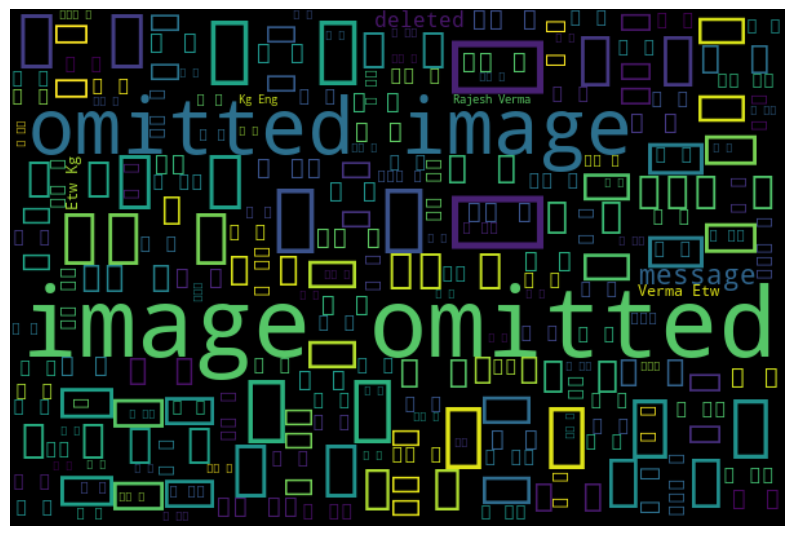

In [5]:
from wordcloud import WordCloud

# Create a list of words
all_words = ' '.join([word for word in df['message']])

# Word Cloud
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

total_joined:569, total_left:110


,new_joinee,left_user
ym,,
202207,23,0
202208,50,2
202209,3,2
202210,4,3
202211,3,4
202212,2,2
202301,15,6
202302,38,3
202303,51,7


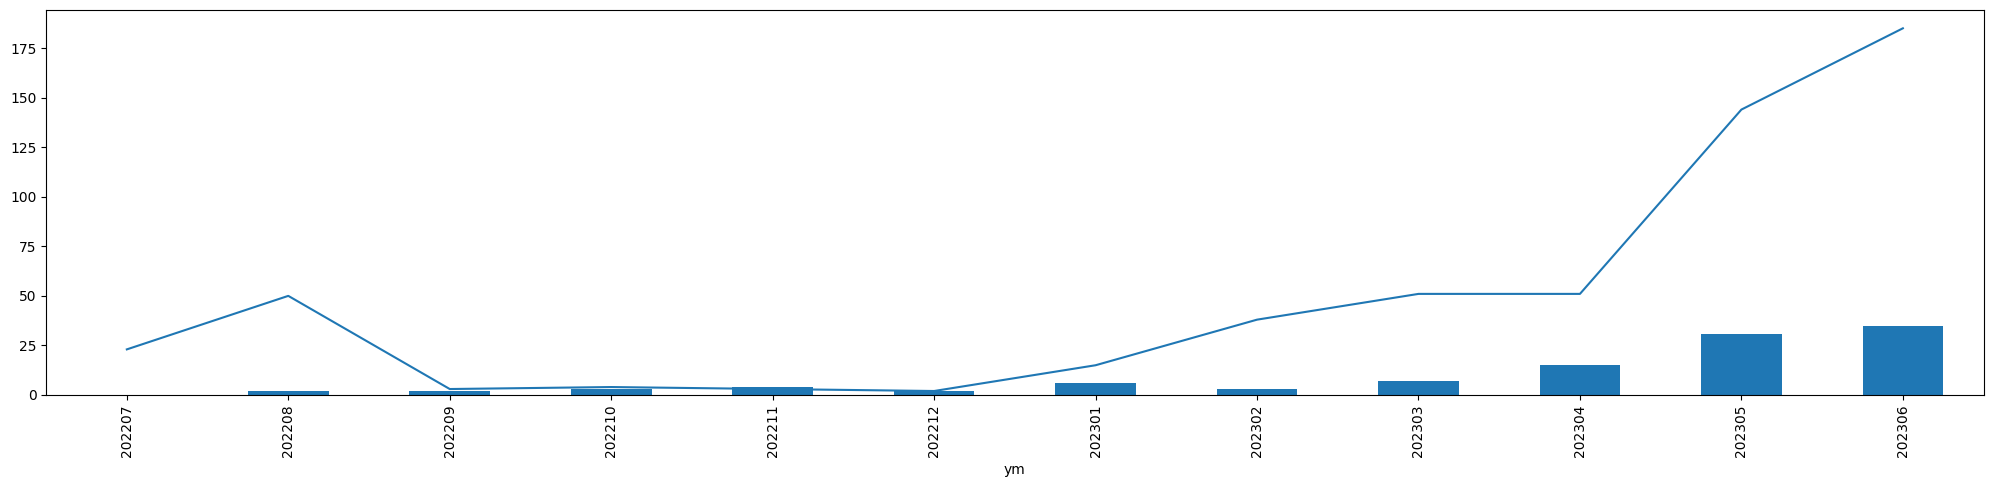

In [6]:
#joined vs left users

monthly_user_joined = df.groupby(['ym'])['new_joinee'].agg('sum')
monthly_user_left = df[df['msg_catg'] == 'MemberLeft'].groupby(['ym'])['msg_catg'].agg('count')

monthly_data_df = pd.DataFrame(monthly_user_joined)
monthly_data_df['left_user'] = monthly_user_left
monthly_data_df['left_user'] = monthly_data_df['left_user'].fillna(0)
monthly_data_df['left_user'] = monthly_data_df['left_user'].astype('int')

plt.figure(figsize=(25,5))
#monthly_data_df['new_joinee'].plot()
monthly_data_df['new_joinee'].plot()
monthly_data_df['left_user'].plot.bar()

print(f'total_joined:{monthly_data_df.new_joinee.sum()}, total_left:{monthly_data_df.left_user.sum()}')
monthly_data_df

In [30]:
n_users_posted = df['user'].nunique()
day_nmsg = df.day.value_counts()
user_added_by = df['user_added_by'].value_counts()
msg_catg = df['msg_catg'].value_counts()

print(f'n_users_posted:{n_users_posted}\n \nday_nmsg:{day_nmsg}\n \nuser_added_by:{user_added_by}\n \
\nmsg_catg:{msg_catg}\n')

#df['user'].unique()

n_users_posted:384
 
day_nmsg:day
Sunday       1567
Monday       1477
Tuesday      1369
Thursday     1189
Wednesday    1168
Friday       1087
Saturday     1078
Name: count, dtype: int64
 
user_added_by:user_added_by
msg                                      8593
‎Rajesh Verma Etw Kg Eng                  111
joined by link                             78
‎Ajay Verma (Blr)                          50
‎Shani Etw Ram Shyam Bhai                  42
‎Meena Bhabhi Pikku Bhai                   18
‎Kshitij  Verma Etw Sonu                   14
‎Raju Sai Tent House                       12
‎Yogesh Kg Etw Announce                     7
‎Shashan Pratap Namak Etw                   3
‎Paridhi Verma Etw                          2
Newly                                       1
Ok Logo also can be                         1
‎image omaj: ‎Rajesh Verma Etw Kg Eng       1
‎This group was                             1
Thanks                                      1
Name: count, dtype: int64
 
msg_catg:msg_catg
me

top 20 user posted msg: user
Ashish Patel                1066
Eng. Rajesh Verma           1039
Ajay Verma                   574
Tarun Verma                  537
Ankit Verma                  338
K.K.Singh Agra               273
Raju Sai Tent House          256
Dr Visesh                    199
anupampatel874               172
Dcosta Bhai                  146
Rajkumar Verma (Prince)      144
100rabh                      140
Gaurav Verma                 134
Shashank                     132
Yogesh Verma                 117
Devicharn Uncle Dibyapur     116
Kuldeep Verma                115
Omkar Verma                  107
narendrasinghvermaetw        101
Abhijeet Chaudhari            97
Name: count, dtype: int64


<Axes: xlabel='user'>

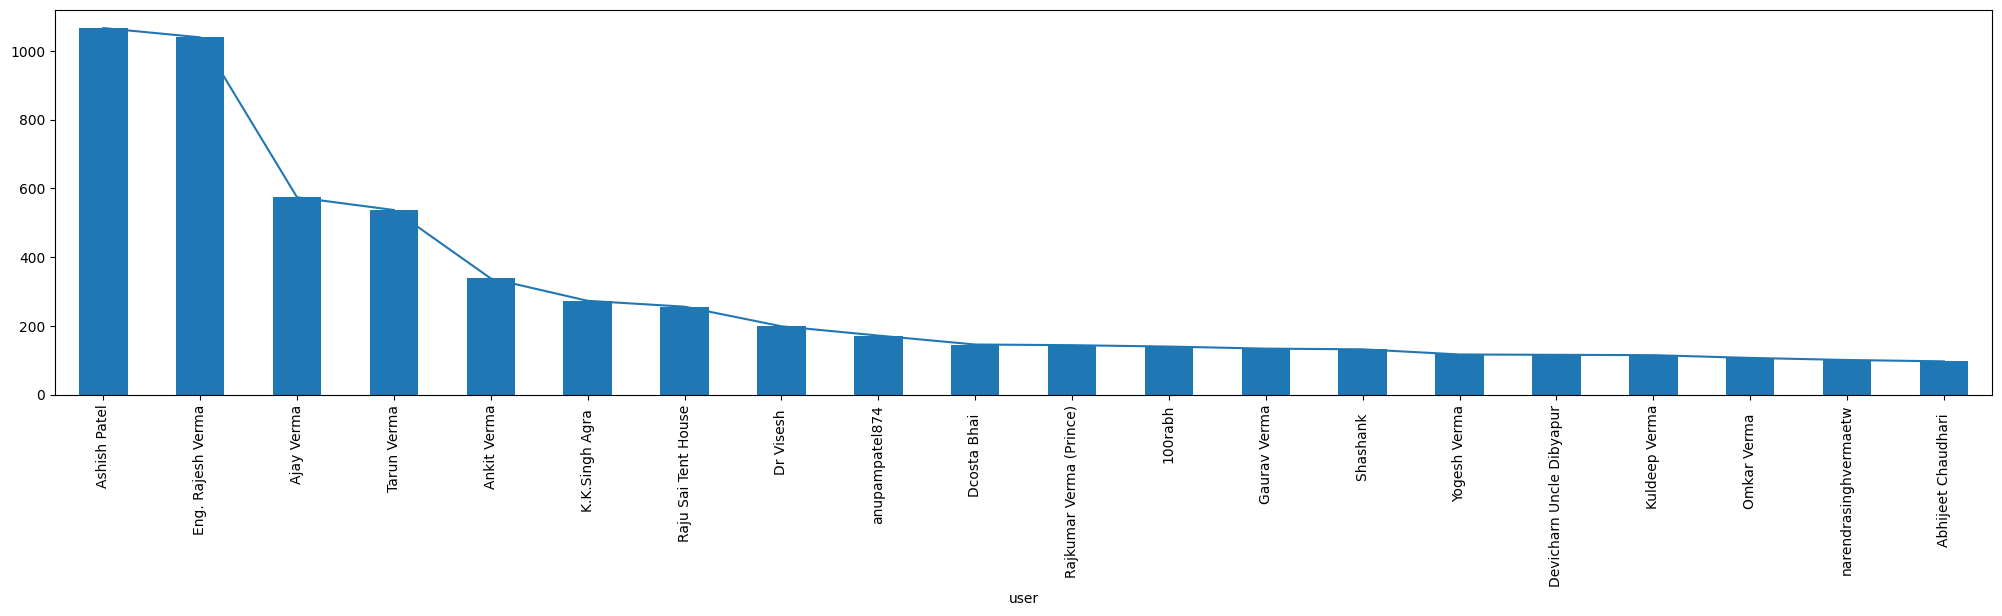

In [113]:
# Top 20 highest msg sent

print('top 20 user posted msg:', df.user.value_counts()[0:20])
plt.figure(figsize=(25,5))
df.user.value_counts()[0:20].plot()

df.user.value_counts()[0:20].plot.bar()

In [ ]:
#testing left member analysis

lft = 'â€ŽRN Etw left'
lft = 'â€Žâ€ª+91Â 85339Â 05030â€¬ left'
lft1 = lft.split('left')[0].strip(' ')

#''.join([i for i in lft1 if i.isalpha()])
#"".join(re.findall(r'[^\W\d_]', lft1))
re.sub(r'[^A-Za-z0-9 ]+', '', lft1)

In [ ]:
df.msg_catg.value_counts()

Text(0.5, 1.0, 'Median(line) vs Mean(bar) - Length of messages')

C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  func(*args, **kwargs)

C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


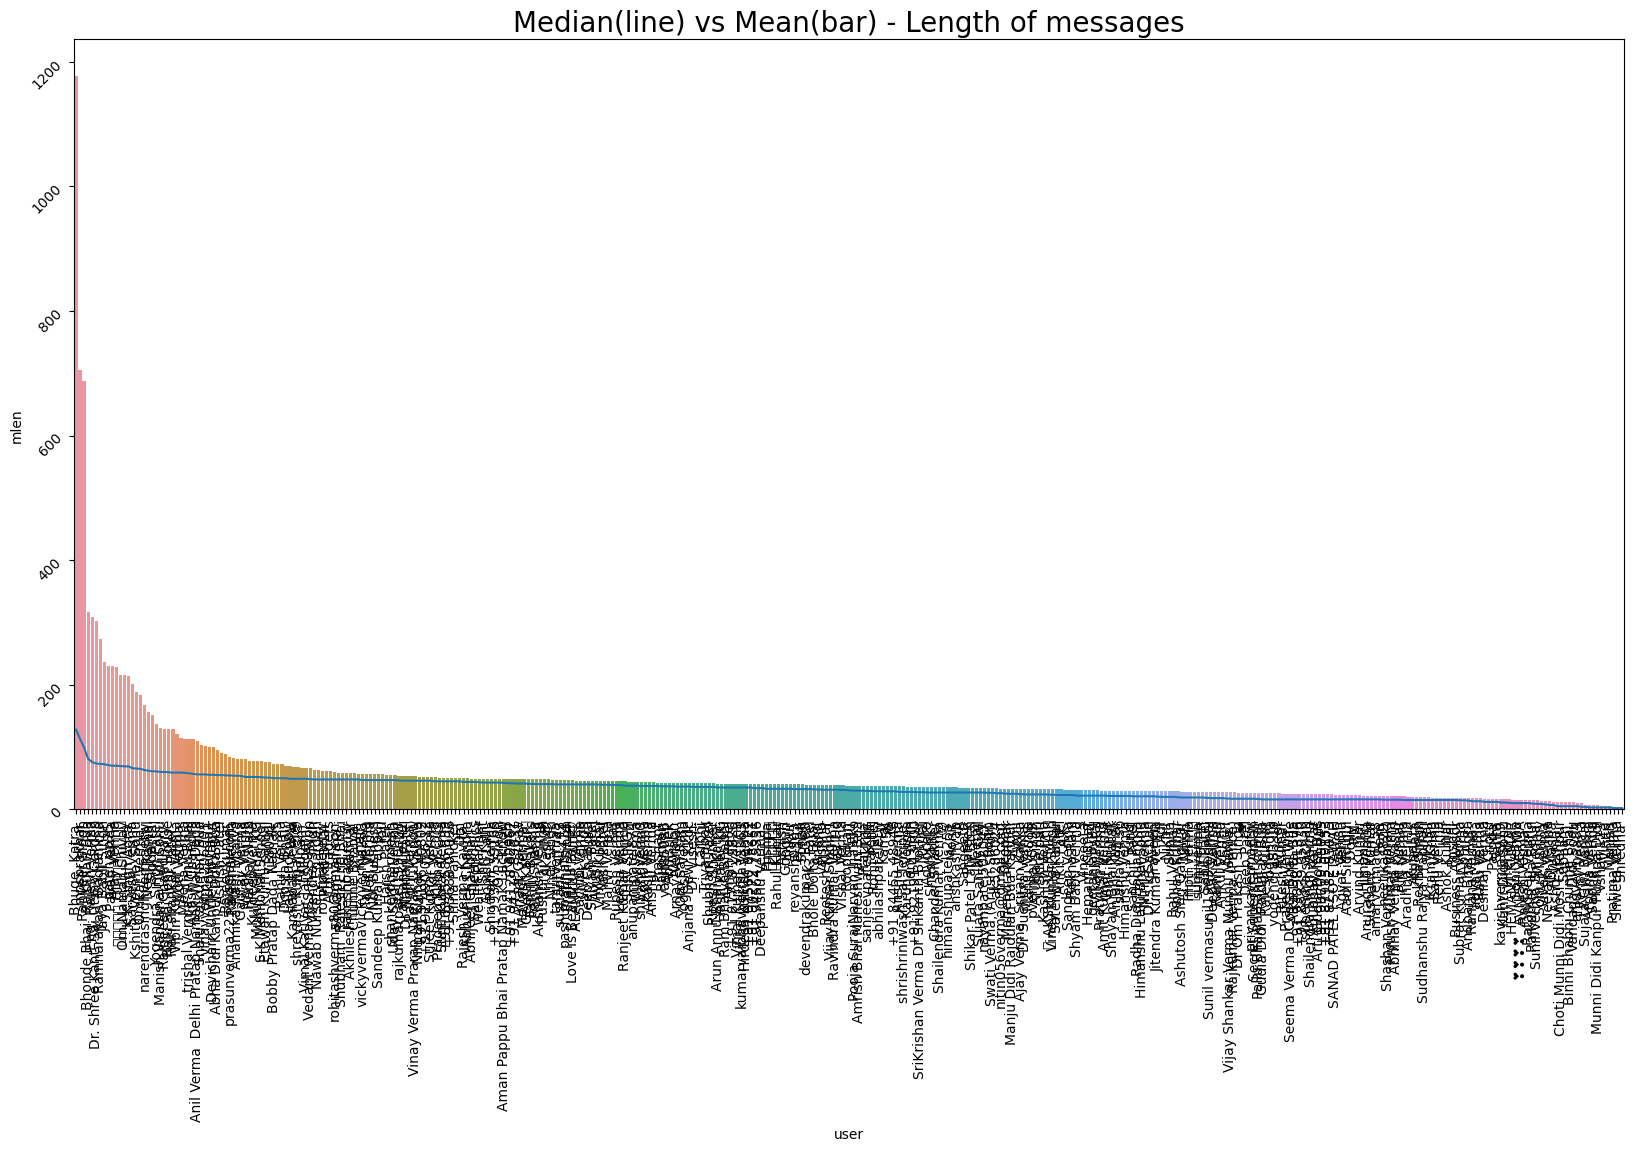

In [25]:
#9. The total per-message length Mean & Median, per person.

median_len = df.groupby('user', as_index=False)['mlen'].median().sort_values(by='mlen', ascending=False)

mean_len = df.groupby('user', as_index=False)['mlen'].mean().sort_values(by='mlen', ascending=False)


fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
sns.lineplot(x='user', y='mlen', data=median_len)
p = sns.barplot(x='user', y='mlen', data=mean_len)
p.set_title('Median(line) vs Mean(bar) - Length of messages', fontsize = 20)

Text(0.5, 1.0, 'Most Repeated Words')

C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  func(*args, **kwargs)
C:\U

C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarni

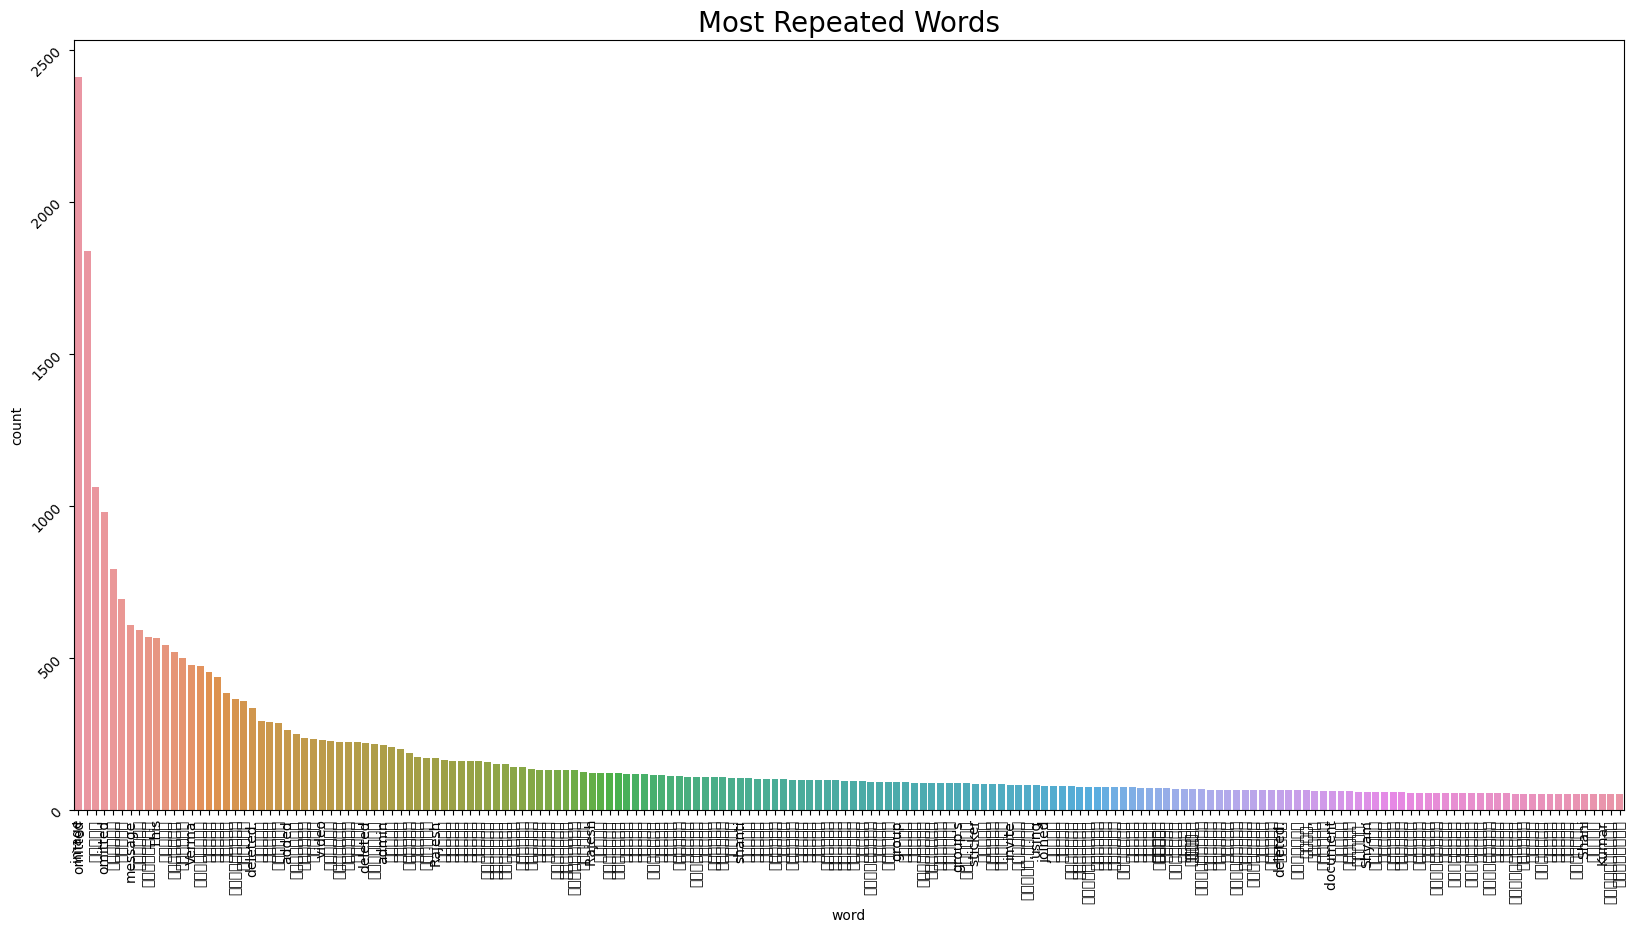

In [115]:
#11. Word frequency.

def prepare_word_count(df):
    m = ''
    for i in df:
        m=m+i+' '
    m = m.split(' ')


    mydict={}
    for word in m:
        word = str(word.strip())
        if len(word)<=4: continue
                   
        if word in mydict:
            mydict[word]+=1
        else:
            mydict[word]=1


    wordlist = pd.DataFrame.from_dict(mydict, orient='index').reset_index()
    wordlist.rename(columns={'index':'word',0:'count'}, inplace=True)
    wordlist.sort_values(by='count', ascending=False, inplace=True)
    data = wordlist[wordlist['count'] >50]
    return data

import seaborn as sns

data = prepare_word_count(df['message'])
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
p = sns.barplot(x='word', y='count', data=data)
p.set_title('Most Repeated Words', fontsize = 20)

Text(0.5, 1.0, 'Hour vs No. Of Messages')

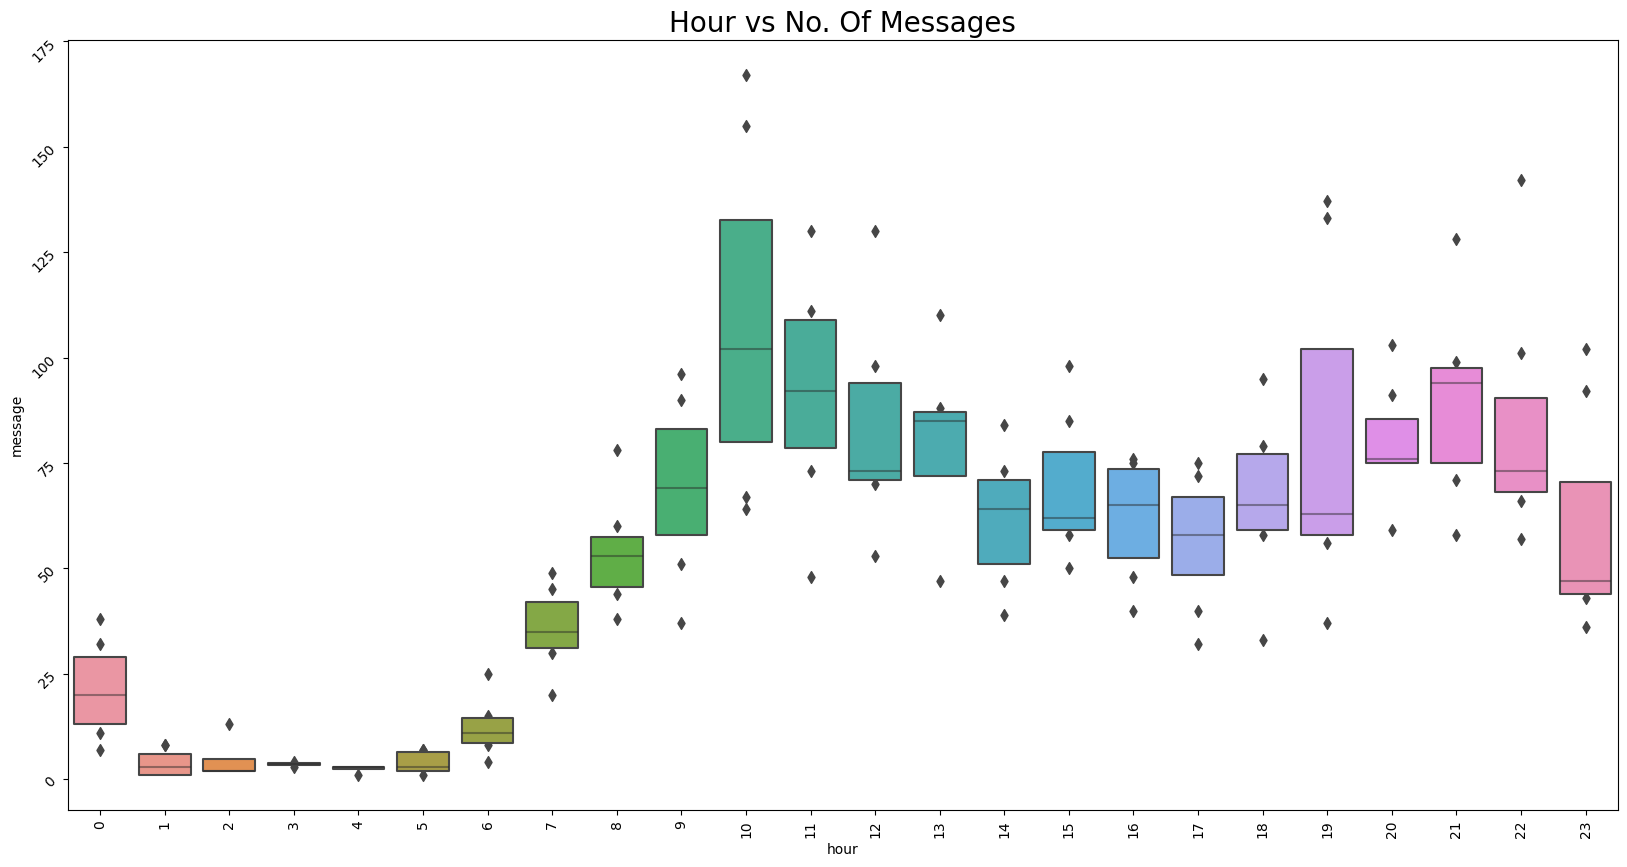

In [116]:
#15. Mind the time. 

hourdata = df[['day','hour','user','message']]
hd = hourdata.groupby(['day','hour'], as_index=False)['message'].count()


fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
p = sns.boxenplot(x='hour', y='message', data=hd)
p.set_title('Hour vs No. Of Messages', fontsize = 20)

C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  func(*args, **kwargs)


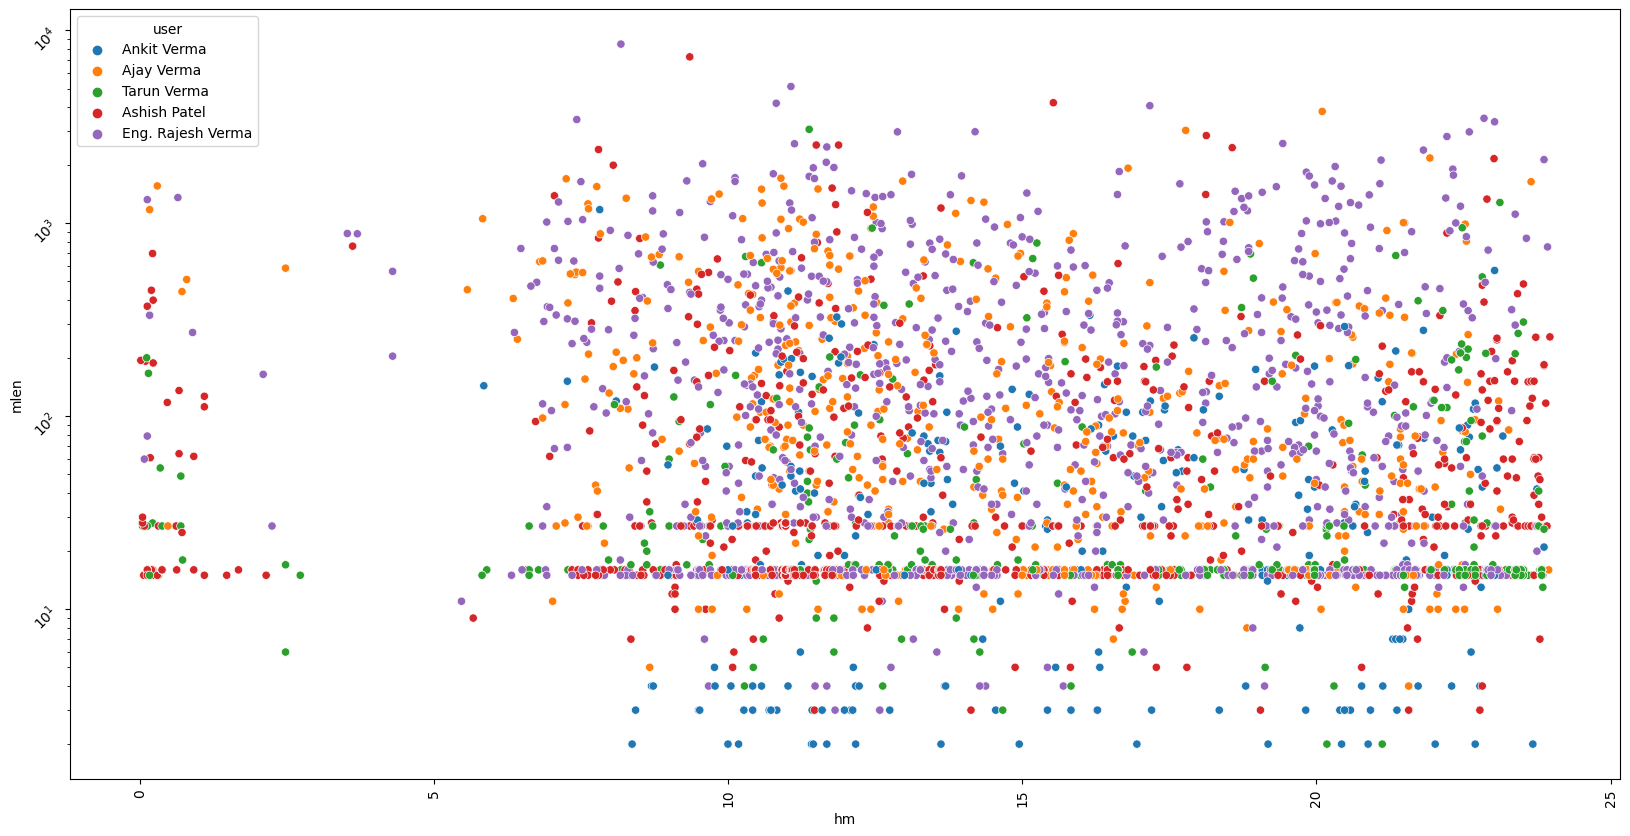

C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ajverma\AppData\Local\anaconda3\envs\nlp397\lib\site-packages\IPython\core\pylabtools.py:152: UserWarn

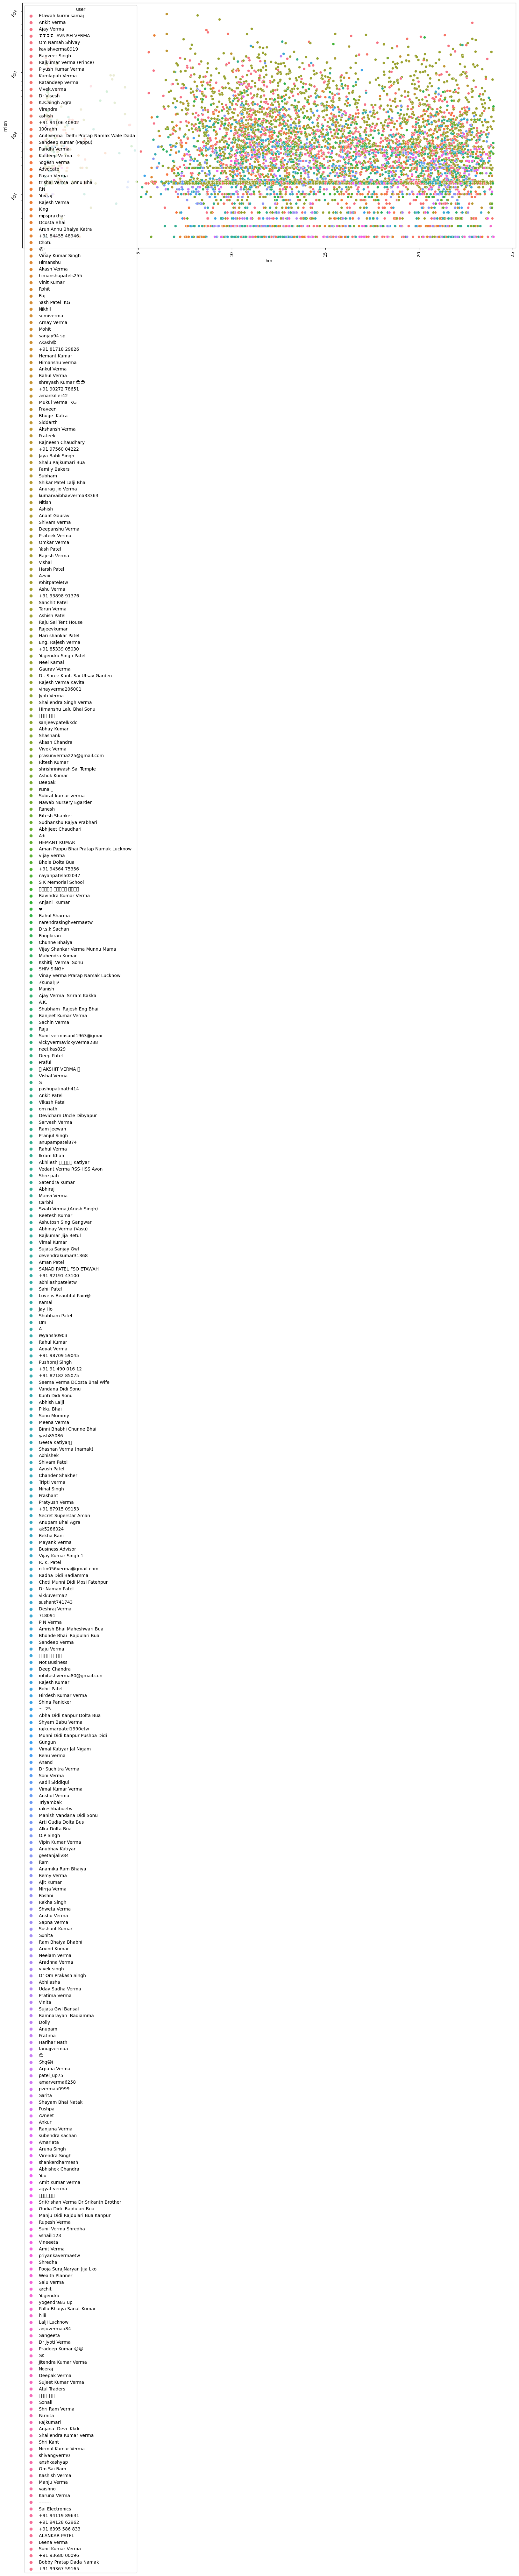

In [117]:
# 16. Time of day vs Length of messages. I was wondering whether people tend to send only short messages at busy times (office hours) and longer messages in the evening time.

def mlen_vs_person(name_list):
    data  = df[df['user'].isin(name_list)]
    data = data[['hm','mlen','user']]
    
    fig = plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    ax = sns.scatterplot(x='hm', y='mlen', hue='user', data=data)
    ax.set_yscale("log")


mlen_vs_person(['Eng. Rajesh Verma', 'Ashish Patel', 'Tarun Verma', 'Ajay Verma', 'Ankit Verma'])
time_mlen = df[['hm','mlen','user']]
time_mlen
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
ax = sns.scatterplot(x='hm', y='mlen', hue='user', data=time_mlen)
ax.set_yscale("log")

In [ ]:
#17. The immediate reply buddies! 

follow = df['user']
fdict={}
j = 'init'
for i in follow:
    if i+'-'+j in fdict:
        
        if i!=j:
            fdict[i+'-'+j]+=1
            j=i
    else:
        if i!=j:
            fdict[i+'-'+j]=1
            j=i


followdf = pd.DataFrame.from_dict(fdict, orient='index').reset_index()
followdf.rename(columns={'index':'name-pair',0:'count'}, inplace=True)
followdf = followdf[followdf['count']>40]
followdf.sort_values(by='name-pair', inplace=True)


fig = plt.figure(figsize=(20,20))
plt.xticks(rotation=0)
plt.yticks(rotation=0)
p = sns.barplot(y='name-pair', x='count', data=followdf)
p.set_title('Messages - Person to Immediate Followup person count', fontsize = 20)

In [ ]:
df.user.value_counts()[0:20]

In [ ]:
df.emojis_count.value_counts()
df.emojis_count.max()

df[df.emojis_count == df.emojis_count.max()]

In [ ]:
df.head()

In [ ]:
from matplotlib import pyplot as plt

# joined_per_month=df.groupby('month_year', as_index=False)['new_joinee'].sum().sort_values(by='new_joinee', ascending=False)
# print('joined_per_month:\n', joined_per_month)
# p = plt_bar('month_year', 'new_joinee', joined_per_month, 'New Member count Per Month')

joined_per_month=df.groupby('ym', as_index=False)['new_joinee'].sum()
print('joined_per_month:\n', joined_per_month)
p = plt_bar('ym', 'new_joinee', joined_per_month, 'New Member count Per Month')

In [ ]:
#TBC

word_dict = dict.fromkeys(df['user'].unique())

for key in word_dict.keys():
    word_dict[key] = {}

for name, msg in zip(df['user'], df['message']):
    for word in msg.split():
        
        # If word contains the 'media ommited' message ignore
        if word not in ['<Media', 'omitted>']: 
            if word in word_dict[name]:
                word_dict[name][word] += 1
            else:
                word_dict[name][word] = 1
                
# Sorting emoji dictionary in descending order of word frequency
for name in df['user'].unique():
    word_dict[name] = {k: v for k, v in sorted(word_dict[name].items(), key = lambda item: item[1], reverse = True)}

# grouped_df = df.groupby('user').sum().reset_index()
# grouped_df['most_used_words'] = grouped_df['user'].apply(lambda x: word_dict[x])
# grouped_df[['user', 'most_used_words']]
# word_dict
# grouped_df

In [ ]:
import emoji

df['emojis'] = df['message'].apply(lambda x: ''.join(c for c in x if c in emoji.UNICODE_EMOJI))
df.head()
#emoji.UNICODE_EMOJI['en']

In [ ]:

def emoji_count(text):

    import emoji
    import regex

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

line = ["🤔 🙈 me así, se 😌 ds 💕👭👙 hello 👩🏾‍🎓 emoji hello 👨‍👩‍👦‍👦 how are 😊 you today🙅🏽🙅🏽"]

counter = split_count(line[0])
print(' '.join(emoji for emoji in counter))

len(counter)

In [ ]:
df.emojis.value_counts(), df.shape

In [ ]:
# Filtering out messages that don't contain emojis
df['emojis'] = df['msg'].apply(lambda x: ''.join(c for c in x if c in emoji.UNICODE_EMOJI))
emoji_df = df[df['emojis'].apply(lambda x: True if x else False)]

emoji_dict = dict.fromkeys(df['name'].unique())
for key in emoji_dict.keys():
  emoji_dict[key] = {}
  for emoji_key in emoji.UNICODE_EMOJI.keys():
    emoji_dict[key][emoji_key] = 0

# Counting occurence of each emoji for each person
for name, emojis in zip(emoji_df['name'], emoji_df['emojis']):
  for single_emoji in emojis:
    emoji_dict[name][single_emoji] += 1

# Sorting emoji dictionary in descending order of emoji frequency
for name in df['name'].unique():
  emoji_dict[name] = {k: v for k, v in sorted(emoji_dict[name].items(), key = lambda item: item[1], reverse = True)}

# Using grouped_df, getting top 5 used emojis for each person, and constructing bar plot of overall emoji count for each person
# Following line used to get top 5 used emojis from the sorted emoji dictionary. Thank you StackOverflow.
grouped_df['most_used_emojis'] = grouped_df['name'].apply(lambda x: dict(itertools.islice(emoji_dict[x].items(), 5)))
grouped_df['total_emojis_used'] = grouped_df['name'].apply(lambda x: sum(emoji_dict[x].values()))
grouped_df = grouped_df.sort_values(by = 'total_emojis_used', ascending = False)
plt.figure(figsize = (12, 6))
sns.barplot(x = 'name', y = 'total_emojis_used', data = grouped_df, palette = get_colors_of_certain_order(grouped_df['name']))
plt.title('Total Emojis Used')
grouped_df[['name', 'most_used_emojis']]

In [ ]:
df.head()

left_per_month: Empty DataFrame
Columns: [month_year, message]
Index: []


ValueError: min() arg is an empty sequence

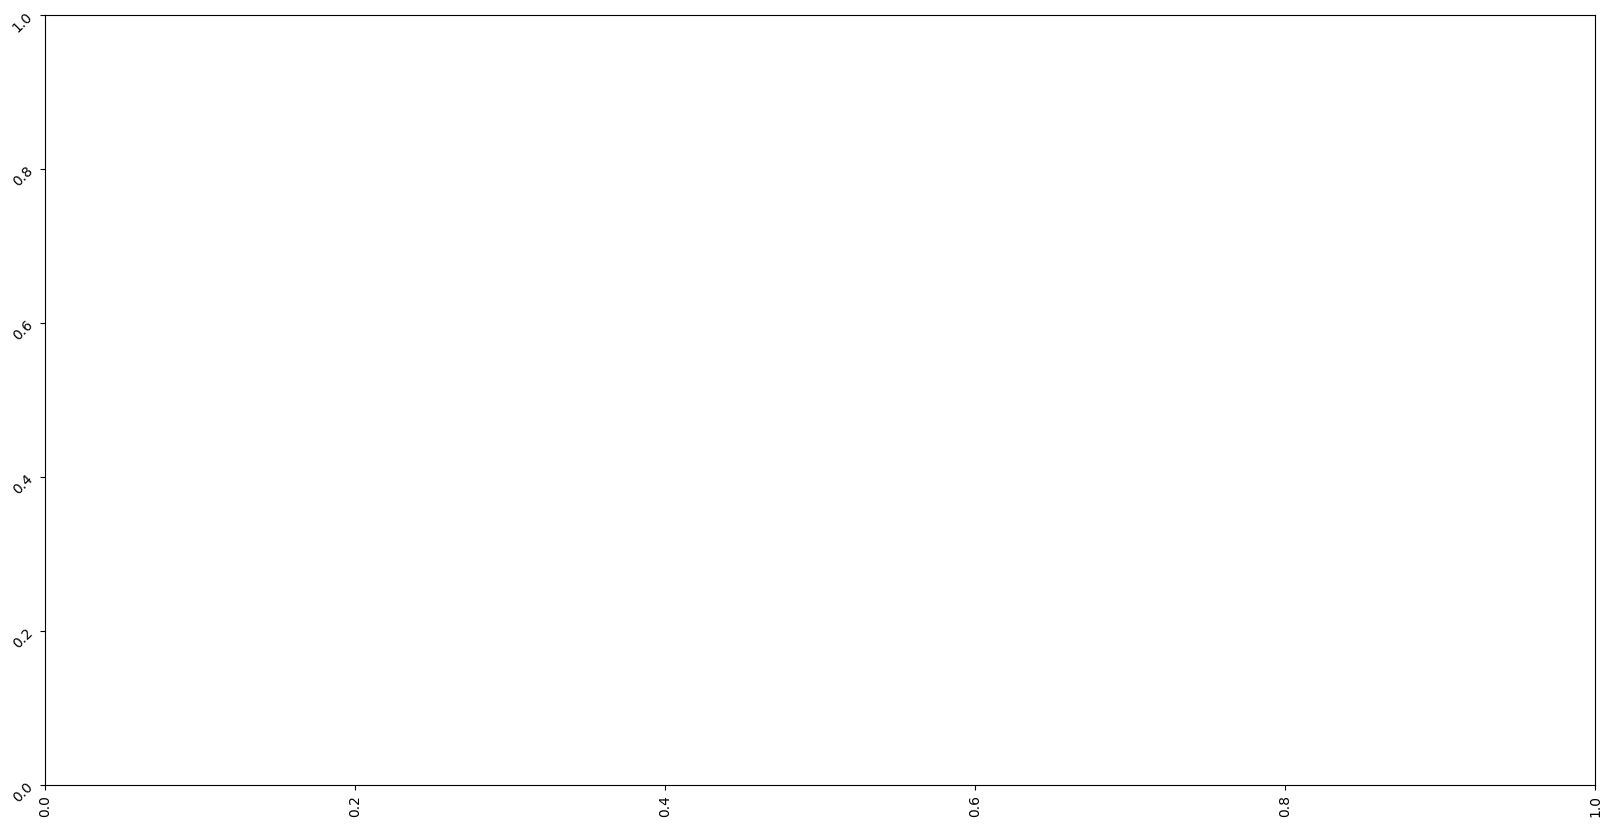

In [31]:
#left per month

df1 = df[df.msg_catg == 'left']
df1.head()

left_per_month=df1.groupby('month_year', as_index=False)['message'].count().sort_values(by='message', ascending=False)
print('left_per_month:', left_per_month)
p = plt_bar('month_year', 'message', left_per_month, 'Left Member count Per Month')

In [ ]:
#1. The progression of total messages per month over the years.

msg_per_month=df.groupby('month_year', as_index=False)['message'].count().sort_values(by='message', ascending=False)
p = plt_bar('month_year', 'message', msg_per_month, 'Total messages Per Month')

# msg_per_month=df.groupby('ym', as_index=False)['message'].count().sort_values(by='message', ascending=False)
# p = plt_bar('ym', 'message', msg_per_month, 'Total messages Per Month')

In [ ]:
#2. Total messages per person #barchart.
msg_per_person=df.groupby('user', as_index=False)['message'].count().sort_values(by='message', ascending=False)

msg_per_person = msg_per_person[msg_per_person.message > 50]

p = plt_bar('user', 'message', msg_per_person, 'Total messages Per Person')

In [ ]:
#3. Total messages per year.
msg_per_year=df.groupby('year',as_index=False)['message'].count()
p = plt_bar('year', 'message', msg_per_year, 'Total Messages Per Year')

In [ ]:
#4. Messages per day.
msg_per_day=df.groupby('day',as_index=False)['message'].count().sort_values(by='message', ascending=False)
plt_bar('day', 'message', msg_per_day, 'Messages Per Day')

In [ ]:
#5. Messages per date of the month. 
msg_per_date=df.groupby('date',as_index=False)['message'].count().sort_values(by='message', ascending=False)
plt_bar('date', 'message', msg_per_date, 'Message Per Date')

In [ ]:
#6. Show word cloud for the entire conversation text.
text = prepare_cloud_text(df)
plt_word_cloud(text)

In [ ]:
#7. Show the word cloud of a specific person. This one is for Arun Nair.

text = prepare_cloud_text(df, user='Eng. Rajesh Verma')
#plt_word_cloud(text)
text

In [ ]:
def plt_heatmap(df,x,y, title=False):   
    data = df.groupby([x,y], as_index=False)['message'].count()    
    data = data.pivot(y, x, "message")
    fig = plt.figure(figsize=(12,10))
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    data = data.reindex(columns=['Monday','Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
    data = data.iloc[::-1]

    p = sns.heatmap(data)
    if title: p.set_title(title, fontsize = 20) 
        
plt_heatmap(df, 'day', 'hour')

In [ ]:
#8. Heat map of Day vs Hour of the day.

plt_heatmap(df, 'day', 'hour')

In [ ]:
type(msg_per_person)
msg_per_person

In [ ]:
msg_per_person[msg_per_person.message > 50]

In [ ]:
#testing logic breakup

import pandas as pd

txt_file = conversationPath
# some regex to account for messages taking up multiple lines
with open(txt_file, encoding="utf8") as file:
    data = file.read()
    data = data.splitlines()
    
print(f'data-len:{len(data)}, data-typ:{type(data)}')

user     = [] 
message  = [] 
datetime = []

import re
for row in data[0:10]:
    print('\n row:', row)
    print(f'row-len:{len(row)}, row:{row}')
    
    if len(row) > 5:
        #1 timestamp is before the first dash
        try:
            #print('inside try:')
            print('inside try:', re.findall(r'\[.*?\]', row)[0])
            
            str_date = re.findall(r'\[.*?\]', row)[0]
            print('str_date:', str_date)
            datetime.append(str(str_date)[1:-1].strip())
            
        except:
            #print('inside except')
            str_date=' '
            #datetime.append('')
            pass
        
        #2 user
        if str_date: #if date there
            try:
                s = re.search('] (.*?):', row).group(1)
                user.append(s)
                print('user:', s)
            except:
                #user.append('')
                pass
            
            #3 message content is after the first colon
            try:
                message.append(row.split(': ', 1)[1])
                print('message:', row.split(': ', 1)[1])
            except:
                #message.append('')
                pass
print(f'user:{len(user)}, message:{len(message)}, datetime:{len(datetime)}')
df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%y, %I:%M:%S %p')
# # remove events not associated with a sender
df = df[df.user != ''].reset_index(drop=True)
    
datetime
user
message
df